In [1]:
# %load projectile(12-64-12).py
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 25 16:49:49 2018
@author: 1203087
"""
get_ipython().run_line_magic('matplotlib', 'inline')
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn as skl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split

tf.reset_default_graph() 
tf.set_random_seed(1)
np.random.seed(1)

# fake data
vel   = 100*np.random.random(size=100000)
theta = 90*np.random.random(size=100000)
inputs = np.stack((vel, theta), axis=-1)
#print(inputs.shape)
#print(vel)
#print('This is input')


vel_train, vel_test, theta_train, theta_test = train_test_split(vel, theta, test_size=0.33, random_state=42)

train_inp = np.stack((vel_train, theta_train), axis=-1)
print(train_inp)

test_inp = np.stack((vel_test, theta_test), axis=-1)
print(test_inp)

r    = vel_train*vel_train*np.sin(2.0*np.radians(theta_train)) / 9.8
h    = vel_train*vel_train*np.sin(np.radians(theta_train))*np.sin(np.radians(theta_train)) / 19.6
ans = np.stack((r, h), axis=-1)
#print(vel[0:5],theta[0:5],r[0:5],h[0:5])
r_test    = vel_test*vel_test*np.sin(2.0*np.radians(theta_test)) / 9.8
h_test   = vel_test*vel_test*np.sin(np.radians(theta_test))*np.sin(np.radians(theta_test)) / 19.6
ans_test = np.stack((r_test, h_test), axis=-1)

def f(v, th, x):
    return np.tan(np.radians(th*90.0)) * x - 4.9 * x * x / (v * v * np.cos(np.radians(th*90.0)) * np.cos(np.radians(th*90.0)))

def hrange(v , th):
    return v*v*np.sin(2.0*np.radians(th*90.0)) / 9.8

def heigh(v , th):
    return v*v*np.sin(np.radians(th*90.0))*np.sin(np.radians(th*90.0)) / 19.6

#x = np.linspace(0, hrange(0.2 , 0.5), 100)
#plt.plot(x, f(0.2 , 0.5, x), 'b--')
#plt.scatter(0.5*hrange(0.2 , 0.5), heigh(0.2 , 0.5),c='r',marker=(5, 1))
#plt.scatter(hrange(0.2 , 0.5), 0,c='g')
##plt.annotate('max', xy=(0.5*hrange(2 , 45), heigh(2 , 45)), xytext=(1.5, -1.5), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.show()

[[52.9454998  22.8559467 ]
 [30.29610447 61.30105573]
 [90.70881746 58.40471531]
 ...
 [36.24201555 81.32828554]
 [56.56621125 38.22204735]
 [96.32429534 15.8326444 ]]
[[50.79266195 82.51062137]
 [61.31703458  8.90519853]
 [ 6.9769652   3.87760573]
 ...
 [77.99738164 71.5375337 ]
 [95.26618414 35.29958273]
 [46.89555209 54.64690399]]


In [2]:
# In[ ]:


with tf.variable_scope('Inputs', reuse=True):
    tf_inputs = tf.placeholder(tf.float32, [None, 2], name='inputs')

with tf.variable_scope('Ans', reuse=True):
    tf_ans = tf.placeholder(tf.float32, [None, 2], name='answers')

with tf.variable_scope('Net', reuse=None):
    l1 = tf.layers.dense(tf_inputs, 12, tf.nn.relu, name='hidden_layer1')
    l1_BN = tf.layers.batch_normalization(inputs=l1, training=True, name='batch_normalization_layer1')
    l2 = tf.layers.dense(l1_BN, 64, tf.nn.relu, name='hidden_layer2')
    l2_BN = tf.layers.batch_normalization(inputs=l2, training=True, name='batch_normalization_layer2')
    l3 = tf.layers.dense(l2_BN, 12, tf.nn.relu, name='hidden_layer3')
    l3_BN = tf.layers.batch_normalization(inputs=l3, training=True, name='batch_normalization_layer3')
    output = tf.layers.dense(l3_BN, 2, name='output_layer')

    # add to histogram summary
    #tf.summary.histogram('h1_out', l1)
    #tf.summary.histogram('h2_out', l2)
    #tf.summary.histogram('pred', output)

loss = tf.losses.mean_squared_error(tf_ans, output, scope='loss')

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.control_dependencies(update_ops):
    train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


tf.summary.scalar('loss', loss)     # add loss to scalar summary

sess = tf.Session()
sess.run(tf.global_variables_initializer())

writer = tf.summary.FileWriter('./log', sess.graph)     # write to file
merge_op = tf.summary.merge_all() # operation to merge all summary

saver = tf.train.Saver()  # define a saver for saving and restoring

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


step:  0 loss:  62048.59
step:  100 loss:  60633.02
step:  200 loss:  59561.89
step:  300 loss:  58263.965
step:  400 loss:  56641.93
step:  500 loss:  54802.754
step:  600 loss:  52749.51
step:  700 loss:  50514.617
step:  800 loss:  48133.082
step:  900 loss:  45641.727
step:  1000 loss:  43077.76
step:  1100 loss:  40477.0
step:  1200 loss:  37873.992
step:  1300 loss:  35298.043
step:  1400 loss:  32778.055
step:  1500 loss:  30336.479
step:  1600 loss:  27991.396
step:  1700 loss:  25755.885
step:  1800 loss:  23637.502
step:  1900 loss:  21639.2
step:  2000 loss:  19759.031
step:  2100 loss:  17993.361
step:  2200 loss:  16332.907
step:  2300 loss:  14774.399
step:  2400 loss:  13312.16
step:  2500 loss:  11943.781
step:  2600 loss:  10667.296
step:  2700 loss:  9482.993
step:  2800 loss:  8386.75
step:  2900 loss:  7378.2856
step:  3000 loss:  6450.626
step:  3100 loss:  5603.85
step:  3200 loss:  4833.8496
step:  3300 loss:  4137.1445
step:  3400 loss:  3510.9368
step:  3500 lo

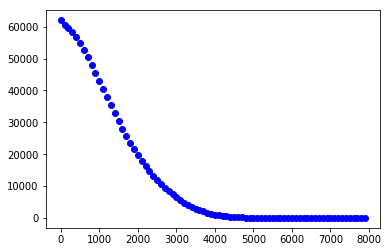

In [3]:
for step in range(8000):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_inputs: train_inp, tf_ans: ans})
    if step % 100 == 0:
        # plot and show learning process
        print('step: ', step, 'loss: ', l) 
        plt.plot(step, l, 'bo', lw=0.6)

#saver.save(sess, './params', write_meta_graph=False)
_, l, pred1 = sess.run([train_op, loss, output], {tf_inputs: test_inp, tf_ans: ans_test})
print('testing data')
print('loss: ', l) 

print(stats.pearsonr(r,pred[:,0])[0])
print(stats.pearsonr(h,pred[:,1])[0])
print('r_test:',stats.pearsonr(r_test,pred1[:,0])[0])
print('h_test:',stats.pearsonr(h_test,pred1[:,1])[0])

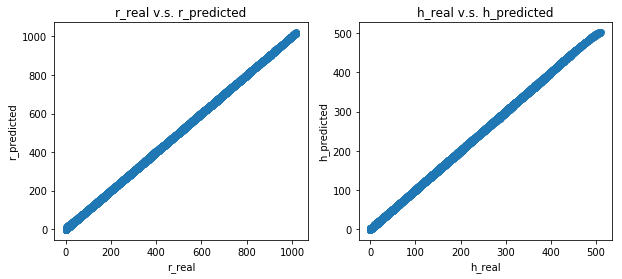

In [4]:
plt.figure(1,figsize=(10,4))
plt.subplot(121)
plt.scatter(r, pred[:,0])
plt.title('r_real v.s. r_predicted')
plt.xlabel('r_real')
plt.ylabel('r_predicted')
plt.subplot(122)
plt.scatter(h, pred[:,1] )
plt.title('h_real v.s. h_predicted')
plt.xlabel('h_real')
plt.ylabel('h_predicted')
plt.show()